## Projeto Final de Aprendizagem de Máquina

### Objetivo
Este projeto tem como objetivo aplicar os conceitos de Aprendizagem de Máquina (AM) abordados durante a cadeira a problemas práticos enfrentados pela sociedade. Utilizaremos um dataset com aplicabilidade prática relevante para implementar diferentes modelos de AM e comparar seus desempenhos.

### Metodologia
Neste projeto, implementaremos os seguintes modelos de Aprendizagem de Máquina:
- Support Vector Machine (SVM)
- Redes Neurais
- Árvores de Decisão

Cada modelo será treinado utilizando o mesmo conjunto de dados e avaliado com métricas adequadas para comparação de desempenho.

### Estrutura do Projeto
Este notebook foca especificamente na implementação do modelo de Redes Neurais. A análise exploratória dos dados (EDA) e pré-processamento foram realizados em um notebook separado.

1. Carregamento dos dados pré-processados
2. Implementação do modelo de Redes Neurais
3. Treinamento do modelo
4. Avaliação do desempenho
5. Análise dos resultados

Os demais modelos (SVM e Árvores de Decisão) serão implementados em notebooks complementares para posterior comparação de resultados.


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)


### 1. Preparação dos Dados e Definição de Parâmetros

#### Definição dos Parâmetros Globais

Para garantir a reprodutibilidade dos experimentos e otimizar o treinamento das redes neurais, definimos os seguintes parâmetros globais:

- **BATCH_SIZE = 128**: Tamanho do lote para treinamento. Este valor oferece um bom equilíbrio entre eficiência computacional e estabilidade do gradiente durante o treinamento.

- **RANDOM_STATE = 42**: Semente para geração de números aleatórios, garantindo que os resultados sejam reproduzíveis em execuções subsequentes.

Estes parâmetros serão utilizados consistentemente em todas as etapas do pipeline de machine learning, desde a divisão dos dados até o treinamento final dos modelos.

In [49]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv")

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Weighted Stress,Mental_Vulnerability_Score,Extreme_Mental_Crisis,Ultimate_Depression_Predictor,Mental_Health_Crisis_Index,Stress_Vulnerability_Multiplier,Depression
0,1,1,2.0,5.90,5.0,2,2,2,0,3.0,2.0,1,2.0,0.395,0,0.3,2,1.40,0
1,1,2,4.0,8.13,3.0,2,2,3,1,1.0,1.0,0,2.8,0.655,1,0.5,4,2.00,0
2,0,2,2.0,5.70,3.0,1,3,6,0,4.0,1.0,0,1.6,0.200,0,0.0,1,0.60,0
3,0,2,3.0,9.54,4.0,3,3,2,0,1.0,2.0,0,2.6,0.210,0,0.0,0,0.50,0
4,1,2,2.0,8.04,4.0,1,1,1,0,0.0,1.0,1,1.6,0.400,0,0.3,2,1.05,0


In [50]:
df.shape

(15870, 19)

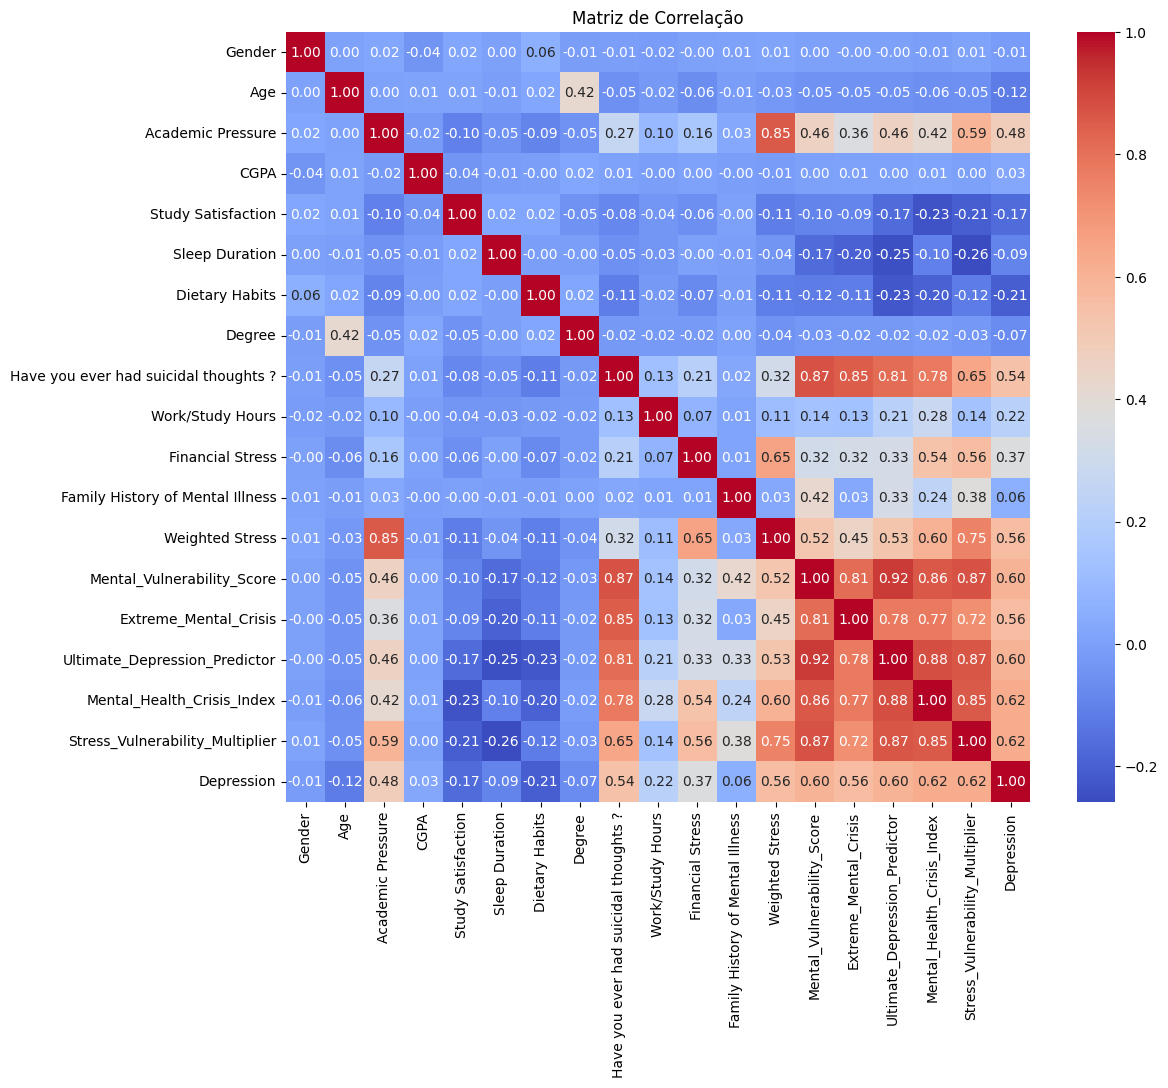

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação')
plt.show()

In [52]:
features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress',
    'Financial Stress','Extreme_Mental_Crisis','Mental_Vulnerability_Score','Mental_Health_Crisis_Index','Stress_Vulnerability_Multiplier',
    'Ultimate_Depression_Predictor','Family History of Mental Illness','Work/Study Hours',
]

df_feature = df[features]

df_feature.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Weighted Stress,Financial Stress,Extreme_Mental_Crisis,Mental_Vulnerability_Score,Mental_Health_Crisis_Index,Stress_Vulnerability_Multiplier,Ultimate_Depression_Predictor,Family History of Mental Illness,Work/Study Hours
0,2.0,0,2.0,2.0,0,0.395,2,1.40,0.3,1,3.0
1,4.0,1,2.8,1.0,1,0.655,4,2.00,0.5,0,1.0
2,2.0,0,1.6,1.0,0,0.200,1,0.60,0.0,0,4.0
3,3.0,0,2.6,2.0,0,0.210,0,0.50,0.0,0,1.0
4,2.0,0,1.6,1.0,0,0.400,2,1.05,0.3,1,0.0


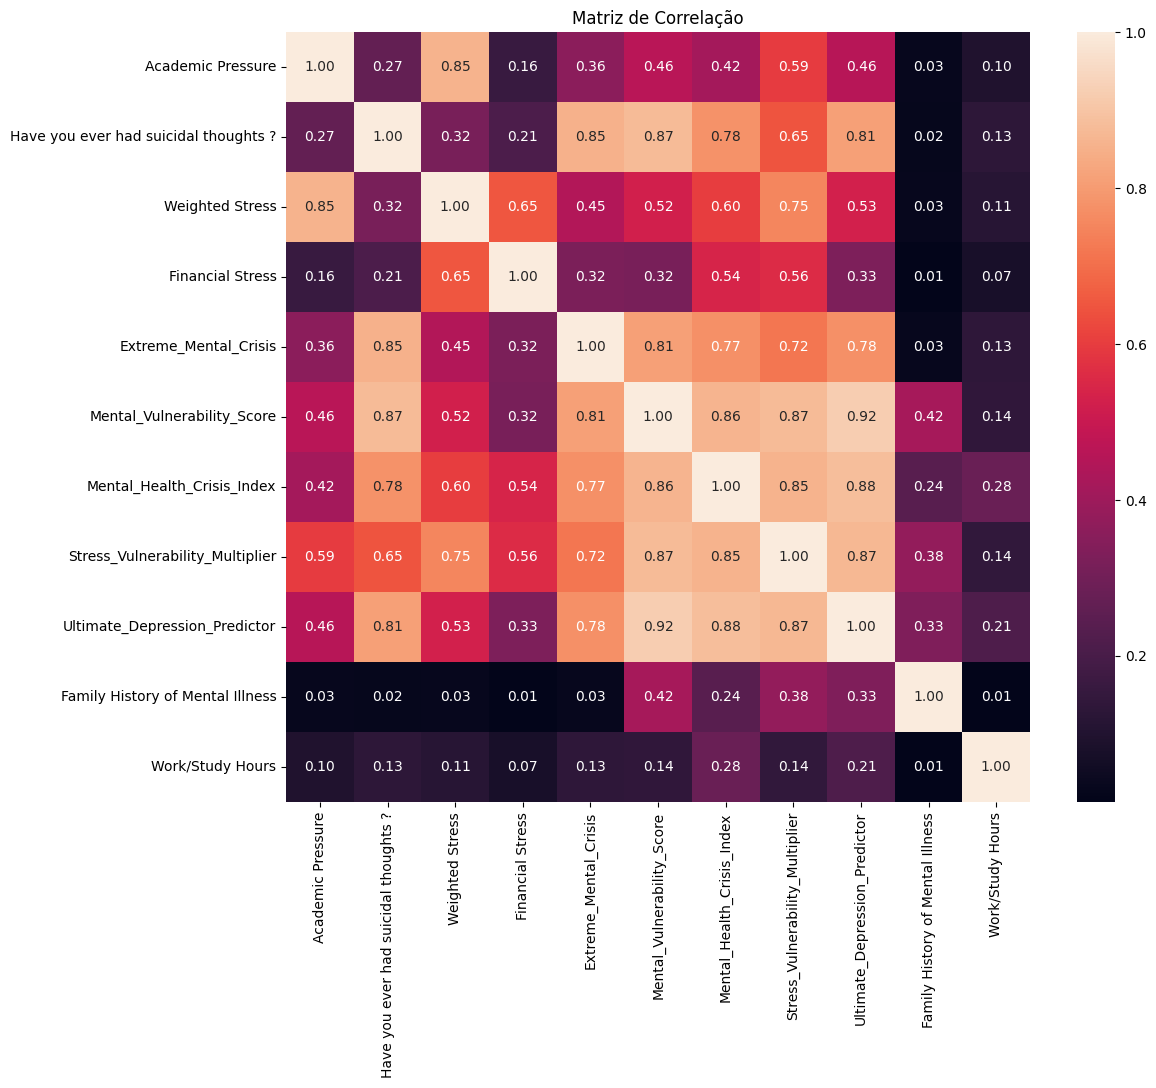

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_feature.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [54]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15870 entries, 0 to 15869
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Academic Pressure                      15870 non-null  float64
 1   Have you ever had suicidal thoughts ?  15870 non-null  int64  
 2   Weighted Stress                        15870 non-null  float64
 3   Financial Stress                       15870 non-null  float64
 4   Extreme_Mental_Crisis                  15870 non-null  int64  
 5   Mental_Vulnerability_Score             15870 non-null  float64
 6   Mental_Health_Crisis_Index             15870 non-null  int64  
 7   Stress_Vulnerability_Multiplier        15870 non-null  float64
 8   Ultimate_Depression_Predictor          15870 non-null  float64
 9   Family History of Mental Illness       15870 non-null  int64  
 10  Work/Study Hours                       15870 non-null  float64
dtypes:

In [55]:
print("\nDistribuição da variável target (Depression):")
print(df['Depression'].value_counts())


Distribuição da variável target (Depression):
Depression
0    7935
1    7935
Name: count, dtype: int64


In [56]:
print("\nPercentual por classe:")
print(df['Depression'].value_counts(normalize=True) * 100)


Percentual por classe:
Depression
0    50.0
1    50.0
Name: proportion, dtype: float64


### 2. Implementação da Rede Neural - Modelo Simples

#### Arquitetura do Modelo

Iniciamos com uma arquitetura de rede neural simples para estabelecer uma linha de base (baseline) para o nosso problema de classificação binária. Esta abordagem minimalista nos permite compreender o comportamento fundamental do modelo antes de explorar arquiteturas mais complexas.

#### Características da Arquitetura

**Camada de Entrada:**
- **Input Layer**: Recebe 10 features de entrada, correspondendo às variáveis preditoras selecionadas durante a análise exploratória

**Camada Oculta:**
- **Dense Layer**: 60 neurônios com ativação tangente hiperbólica (tanh)
- **Kernel Initializer**: 'normal' - inicialização dos pesos com distribuição normal
- **Função de Ativação**: tanh - adequada para capturar relações não-lineares entre as features

**Camada de Saída:**
- **Output Layer**: 1 neurônio com ativação sigmoid
- **Kernel Initializer**: 'normal' - inicialização consistente com a camada anterior  
- **Função de Ativação**: sigmoid - produz probabilidades entre 0 e 1, ideal para classificação binária

#### Justificativa das Escolhas

A **função de ativação tanh** na camada oculta foi escolhida por sua capacidade de produzir saídas no intervalo [-1, 1], o que pode ser benéfico para o aprendizado em problemas com dados padronizados. A **função sigmoid** na saída é padrão para classificação binária, convertendo os valores de saída em probabilidades interpretáveis.

O número de **60 neurônios** na camada oculta representa um compromisso entre capacidade de aprendizado e eficiência computacional, fornecendo flexibilidade suficiente para capturar padrões nos dados sem criar uma arquitetura excessivamente complexa.

Esta configuração serve como nosso **modelo baseline**, estabelecendo uma referência de desempenho que será comparada com arquiteturas mais sofisticadas posteriormente implementadas no projeto.

In [57]:
BATCH_SIZE = 64
RANDOM_STATE = 42

X = df[features[:-1]]  # Todas as features exceto 'Depression'
y = df['Depression']   # Target


In [58]:
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (15870, 10)
Shape de y: (15870,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled


print("\nDivisão dos dados:\n")
print(f"Treino: \nX={X_train.shape}, y={y_train.shape}")
print(f"\nTeste: \nX={X_test.shape}, y={y_test.shape}")


Divisão dos dados:

Treino: 
X=(12696, 10), y=(12696,)

Teste: 
X=(3174, 10), y=(3174,)


In [60]:
model = Sequential()

model.add(Input(shape=(10,)))

model.add(Dense(60, kernel_initializer='normal', activation='tanh')) 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


In [61]:
initial_weights = model.get_weights()

sgd = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 60)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.set_weights(initial_weights)
history = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE)

# Fazendo predições no conjunto de teste
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100


199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - loss: 0.5722
Epoch 2/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.4342
Epoch 3/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8160 - loss: 0.4098
Epoch 4/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8189 - loss: 0.4040
Epoch 5/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.4015
Epoch 6/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4002
Epoch 7/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.3994
Epoch 8/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.3989
Epoch 9/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8226 - loss: 0.3985
Epoch 10/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.3982
Epoch 11/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.3979
Epoch 12/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

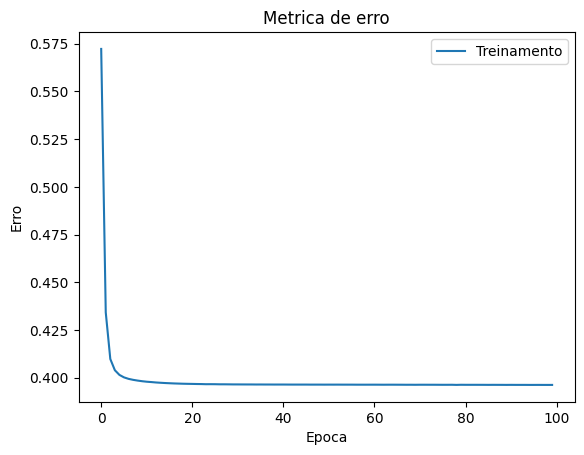

In [63]:
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [64]:
# Primeiro adicione o import necessário se ainda não tiver
from sklearn.metrics import roc_auc_score

# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")


# Calculando métricas detalhadas
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)
test_auc = roc_auc_score(y_test, y_test_pred_proba.flatten())

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")
print(f"   AUC-ROC: {test_auc:.4f}")

# CLASSIFICATION REPORT - O que você queria
print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))




# Armazenando resultados para comparação posterior
keras_test_accuracy = test_accuracy
keras_test_precision = test_precision
keras_test_recall = test_recall
keras_test_f1 = test_f1
keras_test_auc = test_auc


=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.8255
   Loss no conjunto de teste: 0.3913
   Precisão: 0.8226
   Recall: 0.8299
   F1-Score: 0.8262
   AUC-ROC: 0.9042

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.83      0.82      0.82      1587
Com Depressão       0.82      0.83      0.83      1587

     accuracy                           0.83      3174
    macro avg       0.83      0.83      0.83      3174
 weighted avg       0.83      0.83      0.83      3174



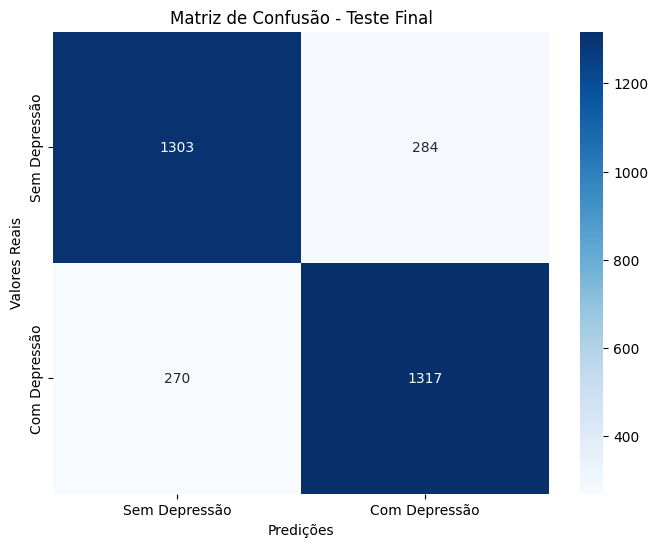

In [65]:
cm = confusion_matrix(y_test, y_test_pred_binary)


# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

### 3. Modelo com Duas Camadas Ocultas e Regularização

#### Arquitetura do Modelo

Para melhorar o desempenho, implementamos um modelo mais robusto com duas camadas ocultas e técnicas de regularização:

**Estrutura:**
- **Entrada**: 10 features
- **Camada 1**: 30 neurônios, ReLU + L2 regularization
- **Camada 2**: 15 neurônios, ReLU + L2 regularization  
- **Saída**: 1 neurônio, Sigmoid

#### Melhorias Implementadas

- **Regularização L2**: Evita overfitting
- **Early Stopping**: Para o treinamento automaticamente
- **Otimizador Adam**: Convergência mais eficiente
- **Validação**: Divide dados em treino/validação para monitoramento

Esta arquitetura oferece maior capacidade de aprendizado mantendo controle sobre overfitting.

In [66]:
from keras import regularizers
from keras.callbacks import EarlyStopping

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

model = Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(30, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(15, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))

# Obtém os pesos iniciais da rede
initial_weights = model.get_weights()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811 (3.17 KB)

 Trainable params: 811 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.set_weights(initial_weights)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=BATCH_SIZE)

y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100


159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8006 - loss: 1.1853 - val_accuracy: 0.8272 - val_loss: 0.9721
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.8572 - val_accuracy: 0.8299 - val_loss: 0.7383
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8184 - loss: 0.6742 - val_accuracy: 0.8303 - val_loss: 0.6002
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8194 - loss: 0.5671 - val_accuracy: 0.8319 - val_loss: 0.5203
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8208 - loss: 0.5050 - val_accuracy: 0.8299 - val_loss: 0.4739
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8204 - loss: 0.4692 - val_accuracy: 0.8315 - val_loss: 0.4469
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8204 - loss: 0.4489 - val_accuracy: 0.8303 - val_loss: 0.4301
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.4368 - val_accuracy: 0.8307

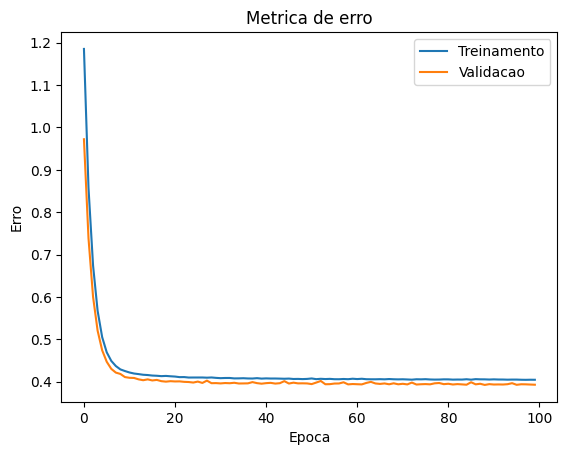

--> E_val - E_in = -0.0106
--> Acuracia (treino): 0.8213
--> Acuracia (validacao): 0.8331
--> acc_train - acc_test = -0.0118


In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia no conjunto de treinamento
E_in, acc_train = model.evaluate(X_train, y_train, verbose=0)

# Obtendo a acuracia no conjunto de validacao
E_val, acc_val = model.evaluate(X_val, y_val, verbose=0)

print(f"--> E_val - E_in = {E_val - E_in:.4f}")
print(f'--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_test = {acc_train - acc_val:.4f}")



In [69]:
# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.2f}")



print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))



=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.83

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.82      0.84      0.83      1587
Com Depressão       0.83      0.82      0.82      1587

     accuracy                           0.83      3174
    macro avg       0.83      0.83      0.83      3174
 weighted avg       0.83      0.83      0.83      3174



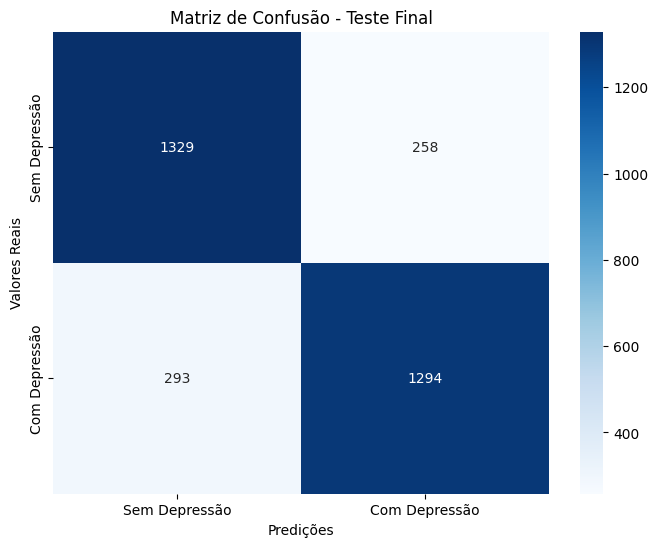

In [70]:
cm = confusion_matrix(y_test, y_test_pred_binary)


# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()